<a href="https://colab.research.google.com/github/Priyadharshini19102/eng-to-fren-translation/blob/main/english_to_french_translation_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow
!pip install --upgrade tensorflow-gpu==2.0
!pip install nltk
!pip install gensim

!pip install spacy
!pip install plotly
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install wordcloud
!pip install jupyterthemes
!pip install sklearn

import pandas as pd
import numpy as np
import nltk
nltk.download('punkt')
nltk.download('stopwords')

ERROR: Could not find a version that satisfies the requirement tensorflow-gpu==2.0 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.12.0)
ERROR: No matching distribution found for tensorflow-gpu==2.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.7/46.7 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 48.2 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for outp

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from collections import Counter
import operator
import plotly.express as px
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, TimeDistributed, RepeatVector, Embedding, Input, LSTM, Conv1D, MaxPool1D, Bidirectional
from tensorflow.keras.models import Model
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [ ]:
df_english = pd.read_csv('/content/vocab_en.csv', sep = '\t', names = ['english'])
df_french = pd.read_csv('/content/vocab_fr.csv', sep = '\t', names = ['french'])

In [ ]:
df_english.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   english  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [ ]:
df_french.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137860 entries, 0 to 137859
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   french  137860 non-null  object
dtypes: object(1)
memory usage: 1.1+ MB


In [ ]:
df = pd.DataFrame([df_english['english'],df_french['french']])
df = df.T
df

,english,french
0,"new jersey is sometimes quiet during autumn , ...",new jersey est parfois calme pendant l' automn...
1,the united states is usually chilly during jul...,les états-unis est généralement froid en juill...
2,"california is usually quiet during march , and...","california est généralement calme en mars , et..."
3,the united states is sometimes mild during jun...,"les états-unis est parfois légère en juin , et..."
4,"your least liked fruit is the grape , but my l...","votre moins aimé fruit est le raisin , mais mo..."
...,...,...
137855,"france is never busy during march , and it is ...","la france est jamais occupée en mars , et il e..."
137856,"india is sometimes beautiful during spring , a...","l' inde est parfois belle au printemps , et il..."
137857,"india is never wet during summer , but it is s...","l' inde est jamais mouillé pendant l' été , ma..."
137858,"france is never chilly during january , but it...","la france est jamais froid en janvier , mais i..."


In [ ]:
def remove_punc(x):
    return re.sub('[!#?,.:";"]', "", x)

df['french'] = df['french'].apply(remove_punc)
df['english'] = df['english'].apply(remove_punc)

In [ ]:
english_words = []
for i in df['english'].values:
    for j in i.split(" "):
        english_words.append(j)
english_words = list(set(english_words))
english_words = english_words[1:]

len(english_words)


199

In [ ]:
french_words = []
for i in df['french'].values:
    for j in i.split(" "):
        french_words.append(j)
french_words = list(set(french_words))
french_words = french_words[1:]

len(french_words)

350

In [ ]:
english_words

['was',
 'likes',
 'birds',
 'cold',
 'white',
 'mangoes',
 'to',
 'october',
 'fun',
 'next',
 'you',
 'mice',
 'september',
 'strawberries',
 'weather',
 'dislikes',
 'california',
 'he',
 'february',
 'china',
 'go',
 'fall',
 'green',
 'never',
 'drives',
 'big',
 'mild',
 'his',
 'snakes',
 'where',
 'november',
 "it's",
 'january',
 'april',
 'think',
 'but',
 'thinks',
 'december',
 'difficult',
 'visit',
 'pears',
 "didn't",
 'yellow',
 'went',
 'united',
 'pleasant',
 'sometimes',
 'saw',
 'are',
 'red',
 'lemon',
 'lime',
 'store',
 'grape',
 'portuguese',
 'lions',
 'pear',
 'cat',
 'grapes',
 'paris',
 'freezing',
 'animal',
 'school',
 'snowy',
 'apples',
 'field',
 'march',
 'june',
 'like',
 'bears',
 'france',
 'liked',
 'winter',
 'apple',
 'limes',
 'dog',
 'new',
 'least',
 'lemons',
 'oranges',
 'may',
 'animals',
 'wanted',
 'we',
 'bear',
 'black',
 'they',
 'easy',
 'lake',
 'automobile',
 'lion',
 'most',
 'a',
 'shiny',
 'rabbits',
 'orange',
 'this',
 'monkey'

In [ ]:
words = []
for i in df['english']:
    for word in i.split():
        words.append(word)

english_words_counts = Counter(words)

english_words_counts = sorted(english_words_counts.items(), key = operator.itemgetter(1), reverse = True)

In [ ]:
english_words_counts

[('is', 205858),
 ('in', 75525),
 ('it', 75137),
 ('during', 74933),
 ('the', 67628),
 ('but', 63987),
 ('and', 59850),
 ('sometimes', 37746),
 ('usually', 37507),
 ('never', 37500),
 ('favorite', 28332),
 ('least', 27564),
 ('fruit', 27192),
 ('most', 14934),
 ('loved', 14166),
 ('liked', 14046),
 ('new', 12197),
 ('paris', 11334),
 ('india', 11277),
 ('united', 11270),
 ('states', 11270),
 ('california', 11250),
 ('jersey', 11225),
 ('france', 11170),
 ('china', 10953),
 ('he', 10786),
 ('she', 10786),
 ('grapefruit', 10692),
 ('your', 9734),
 ('my', 9700),
 ('his', 9700),
 ('her', 9700),
 ('fall', 9134),
 ('june', 9133),
 ('spring', 9102),
 ('january', 9090),
 ('winter', 9038),
 ('march', 9023),
 ('autumn', 9004),
 ('may', 8995),
 ('nice', 8984),
 ('september', 8958),
 ('july', 8956),
 ('april', 8954),
 ('november', 8951),
 ('summer', 8948),
 ('december', 8945),
 ('february', 8942),
 ('our', 8932),
 ('their', 8932),
 ('freezing', 8928),
 ('pleasant', 8916),
 ('beautiful', 8915),
 ('

In [ ]:
# APPENDING VALUES TO DIFFERENT LISTS FOR VISUALIZATION PURPOSES
english_words = []
english_counts = []
for i in range(len(english_words_counts)):
    english_words.append(english_words_counts[i][0])
    english_counts.append(english_words_counts[i][1])

In [ ]:
# PLOTTING BARPLOT USING PLOTLY
fig = px.bar(x = english_words, y = english_counts)
fig.show()

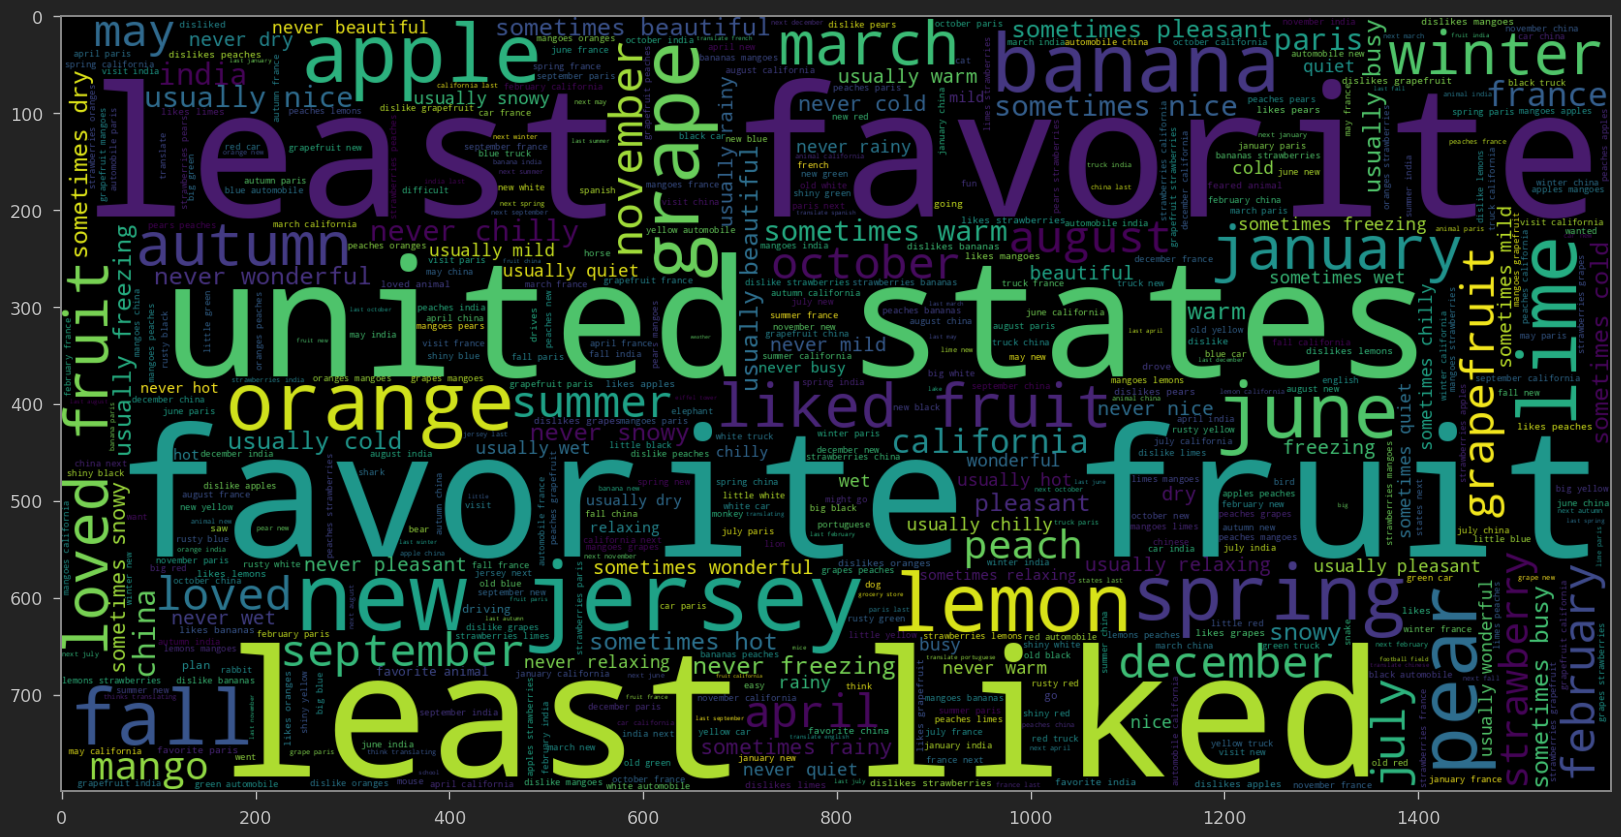

In [ ]:
# PLOTTING A WORDCLOUD FOR ENGLISH
plt.figure(figsize = (20, 20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800).generate(" ".join(df.english))


plt.imshow(wc, interpolation='bilinear')

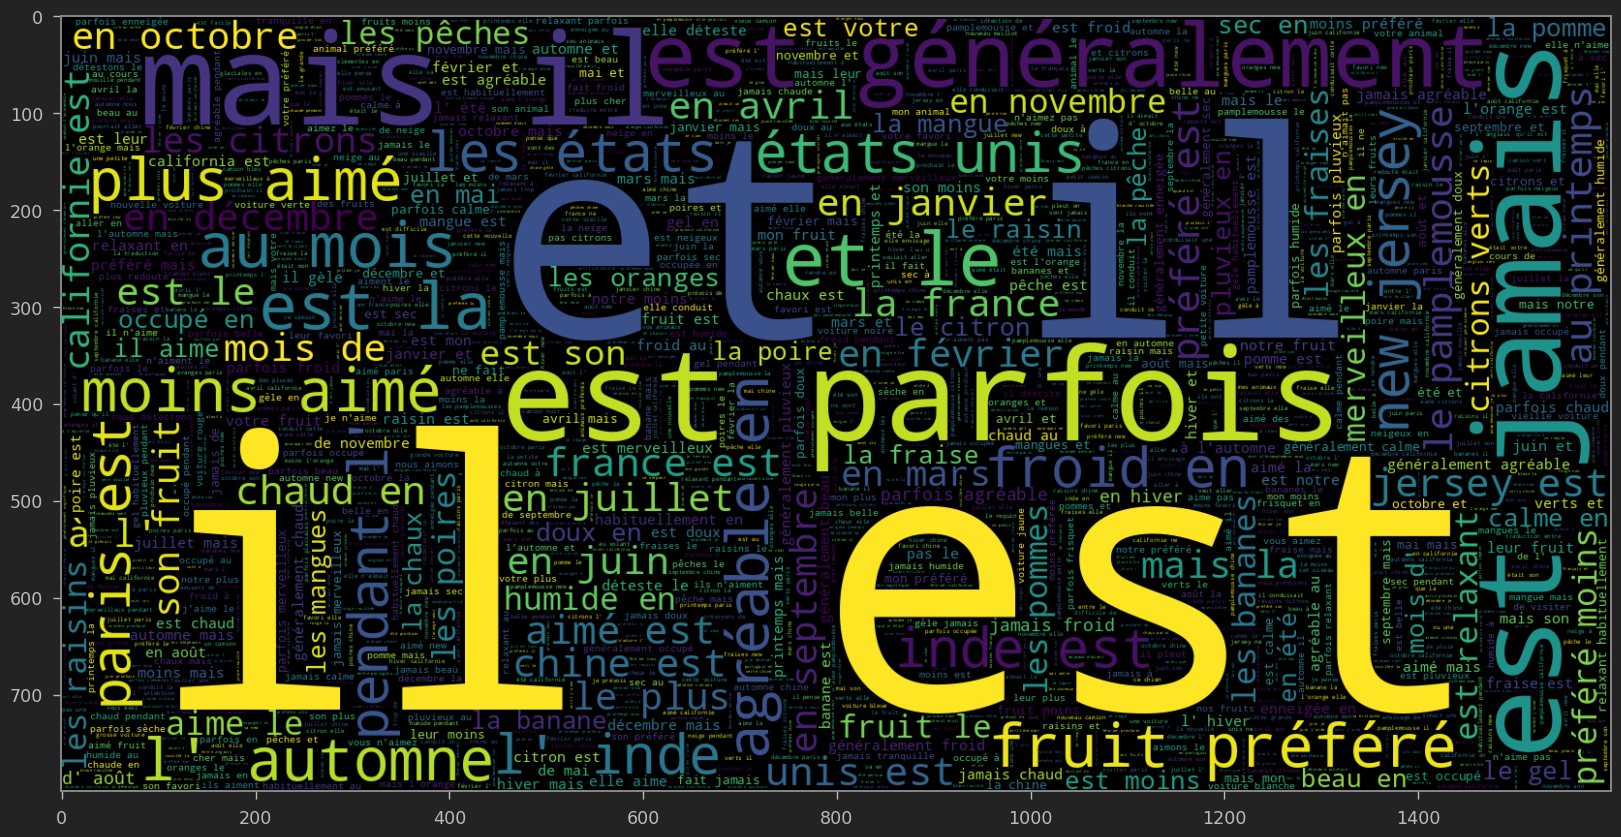

In [ ]:
# PLOTTING WORDCLOUD FOR FRENCH LANGUAGE
plt.figure(figsize = (20, 20))
wc = WordCloud(max_words = 2000, width = 1600, height = 800).generate(" ".join(df.french))


plt.imshow(wc, interpolation='bilinear')

In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
maxlen_english = 0
for doc in df.english:
    tokens = nltk.word_tokenize(doc)
    if maxlen_english < len(tokens):
        maxlen_english = len(tokens)
maxlen_english

15

In [ ]:
maxlen_french = 0
for doc in df.french:
    tokens = nltk.word_tokenize(doc)
    if maxlen_french< len(tokens):
        maxlen_french = len(tokens)
maxlen_french

23

In [ ]:
def tokenize_and_pad(x, maxlen):
    tokenizer = Tokenizer(char_level = False)
    tokenizer.fit_on_texts(x)
    sequences = tokenizer.texts_to_sequences(x)
    padded = pad_sequences(sequences, maxlen = maxlen, padding = 'post')  #TO MAKE LENGTH OF EACH TOKENIZED TEXT EQUAL
    return tokenizer, sequences, padded

x_tokenizer, x_sequences, x_padded = tokenize_and_pad(df.english, maxlen_english)
y_tokenizer, y_sequences, y_padded = tokenize_and_pad(df.french, maxlen_french)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_padded, y_padded, test_size = 0.1)

In [ ]:
english_vocab_size = len(english_words) + 1
french_vocab_size = len(french_words) + 1

# SEQUENTIAL MODEL
model = Sequential()

# ADDING EMBEDDING LAYER

model.add(Embedding(english_vocab_size, 256, input_length = maxlen_english, mask_zero = True))
model.add(LSTM(256))

# DECODER
# ADDING REPEAT VECTOR

model.add(RepeatVector(maxlen_french))
model.add(LSTM(256, return_sequences = True))
model.add(TimeDistributed(Dense(french_vocab_size, activation = 'softmax')))
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning:

Argument `input_length` is deprecated. Just remove it.



Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ repeat_vector (RepeatVector)         │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed (TimeDistributed)   │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
y_train = np.expand_dims(y_train, axis = 2)
y_train.shape

(124074, 23, 1)

In [ ]:
model.fit(X_train, y_train, batch_size = 1024, validation_split = 0.1, epochs = 15)

Epoch 1/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 433s 4s/step - accuracy: 0.4608 - loss: 3.2762 - val_accuracy: 0.5263 - val_loss: 2.1552
Epoch 2/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 447s 4s/step - accuracy: 0.5623 - loss: 1.8973 - val_accuracy: 0.6034 - val_loss: 1.5701
Epoch 3/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 428s 4s/step - accuracy: 0.6149 - loss: 1.4909 - val_accuracy: 0.6464 - val_loss: 1.3461
Epoch 4/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 440s 4s/step - accuracy: 0.6573 - loss: 1.2705 - val_accuracy: 0.6815 - val_loss: 1.1370
Epoch 5/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 444s 4s/step - accuracy: 0.6988 - loss: 1.0683 - val_accuracy: 0.7111 - val_loss: 0.9802
Epoch 6/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 438s 4s/step - accuracy: 0.7388 - loss: 0.9104 - val_accuracy: 0.7413 - val_loss: 0.8748
Epoch 7/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 442s 4s/step - accuracy: 0.7730 - loss: 0.7934 - val_accuracy: 0.7481 - val_loss: 0.8379
Epoch 8/15
110/110 ━━━━━━━━━━━━━━━━━━━━ 443s 4s/step - accuracy: 0.7866 - loss: 0.7270 - val_accu

In [ ]:
from tensorflow.keras.models import Sequential

# Define a simple model as an example
model = Sequential()
# Add layers to your model (e.g., Dense, LSTM, etc.)
# model.add(...)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# Assuming x_train and y_train are your training data and labels
model.fit(x_train, y_train, epochs=10, batch_size=32)


NameError: name 'x_train' is not defined

In [ ]:
model.save("Translator.h5")
